# Programmering med problemer i sannsynlighet


## Litt grunnlag: programmere nPr og nCr
I mange sannsynlighetsproblemer får vi bruk for å regne ut hvor mange mulige utvalg vi kan ta,
om vi tar hensyn til ordning eller ikke.

Hvis vi har en populasjon med $n$ medlemmer, og tar et ordnet utvalg på $r$ medlemmer, kjenner dere
kanskje til formlene for antall mulige ordnede utvalg:



\begin{align}
\text{nPr} & = n\cdot(n-1)\cdot(n-2)\cdots (n - r + 2)\cdot (n - r + 1) \label{pnofac} \\[1.5em]
\text{nPr} & = \frac{n!}{(n - r)!} \label{pfac}
\end{align}

Dersom vi skal ta et uordnet utvalg på $r$ medlemmer fra en populasjon på $n$ medlemmer, kan hvert
utvalg ordnes på $r!$ forskjellige måter.

Med skrivemåten $\text{nCr} = \displaystyle{{n}\choose{r}} $ får vi at


\begin{equation*}
{ {n}\choose{r} }\cdot r! = \text{nPr}, \\[1.5em] 
\end{equation*}


så
$$
{ {n}\choose{r} } = \frac{\text{nPr}}{r!} = \frac{n!}{r!\cdot(n - r)!}
$$





#### *Repetisjonsoppgave*
Vis ved regning at utrykkene (\ref{pnofac}) og (\ref{pfac}) på høyre side over er like



Vi starter med identiteten (\ref{pnofac}) og multipliserer den med brøken $\frac{(n - r)!}{(n - r)!}$
Vi får da 


\begin{align}
\text{nPr} & = n\cdot(n - 1)\cdot(n - 2)\cdots (n - r + 2)\cdot (n - r + 1)\cdot\left(\frac{(n - r)!}{(n - r)!}\right) \\[2em]
           & = \frac{n\cdot(n-1)\cdots(n - r + 1)\cdot(n - r)!}{(n - r)!} \\[2em]
           & = \frac{n!}{(n - r)!}
\end{align}


#### Oppgave
Problemet med å bruke  $n!$  i en beregning er at den ofte blir svært stor. Vi kan demonstrere dette med en enkel implementasjon.
Hvis du har programmert litt Python før, får du i oppgave å implementere en funksjon som regner ut $n!$

In [124]:
def factorial(n):
    # husk at 0! = 1
    if n == 0:
        return 1
    product = 1;
    for k in range(1, n + 1):
        product = product*k
    return product

# test funksjonen
a = factorial(5)
b = factorial(40)

print("5! = ", a)
print("40! = ", b)


5! =  120
40! =  815915283247897734345611269596115894272000000000


problemet når så store tall skal brukes i beregninger, er at datamaskinen ikke kan representere dem effektivt.
Da blir beregningene ofte trege. I noen programmeringsspråk kan så store tall ikke representeres i det hele tatt.

Derfor velger vi helst å bruke identiteten (\ref{pnofac}) i praktiske beregninger.

### Oppgave: Implementer nPr
Lag en funksjon i Python som beregner nPr

In [125]:
def nPr(n, r):
    """
    beregner antall ordnede utvalg på størrelse r fra en populasjon på n medlemmer
    """
    if r == 0:
        return 1
    produkt = n - r + 1 # start med minste faktor
    for k in range(produkt + 1, n + 1):
        produkt = produkt*k
    return produkt

# test av nPr funksjon:
# sjekk at nPr(5, 4) = 120
# Hvis ikke gis en feilmelding
assert nPr(5, 4) == 120
assert nPr(5, 5) == factorial(5)
assert nPr(10, 10) == factorial(10)

### Oppgave: Implementer nCr
Lag en funksjon som beregner nCr, altså antall mulige uordnede utvalg med $r$ medlemmer fra en populasjon på $n$ medlemmer

In [126]:
def naive_nCr(n, r):
    npr = nPr(n, r)
    rfac = factorial(r)
    return npr/rfac

# test noen tilfeller
assert naive_nCr(4, 2) == 6
assert naive_nCr(5, 3) == 10
assert naive_nCr(10, 1) == 10
assert naive_nCr(10, 0) == 1
assert naive_nCr(10, 10) == 1
assert naive_nCr(10, 9) == 10

### Hint til en mer effektiv beregning av nCr
Du har kanskje lagt merke til at vi kan skrive

$$
\text{nCr} = \frac{\text{nPr}}{r!} = \frac{ n\cdot(n-1)\cdot(n-2)\cdots (n - r + 2)\cdot (n - r + 1) }{r\cdot(r - 1)\cdot (r - 2) \cdots 2 \cdot 1}
$$

For eksemepl kan vi skrive

$$
\text{15 C 4} = \frac{15\cdot14\cdot13\cdot12}{4\cdot3\cdot2\cdot1}
$$

Legg merke til at det er like mange faktorer over og under brøkstreken.

Bruk dette til å implementere en funksjon i Python der du beregner nCr i én for-løkke.

## Et første problem
Kåre har guttekveld med kompisene sine. I spillelisten er det 164 sanger. Kåre elsker
Rage Against The Machine. I spillelisten er det 9 låter fra Rage Against The Machine (RATM).

I løpet av kvelden spilles det omtrent 45 sanger fra spillelisten.


Kåre lurer på sjansene for at han får høre noen låter fra RATM


### Løsningsskisser
Her er det to måter å gå fram på, som bygger på hvilke antagelser vi stiller.

1. Utvelgelsen skjer "uten tilbakelegging", dvs. at en sang *ikke kan* spilles flere ganger. Vi bruker da hypergeometrisk sannsynlighet

2. Utvelgelsen skjer "med tilbakelegging", dvs. at en sang *kan* spilles flere ganger. Vi bruker da binomisk sannsynlighet.


I virkeligheten spilles en sang mange liker gjerne flere ganger, men ikke på repeat flere ganger på rappen.
Det virkelige svaret vil derfor gjerne ligge et sted i mellom sannsynlighetene vi finner ved å bruke hypergeometrisk modell
eller binomisk modell.


#### Løsning uten tilbakelegging
* Spillelisten er delt opp i gruppene "RATM" og "Ikke RATM". 
* Det er $9$ sanger fra RATM og  $164 - 9 = 155$ som ikke er fra RATM.
* La $X$ være antall låter som velges fra fra RATM. 
* Det velges da $45 - X$ låter som ikke er fra RATM.

Når vi velger 45 sanger tilfeldig fra spillelisten uten tilbakelegging er sannsynligheten for
at det velges $X$ sanger fra RATM gitt ved


$$ P(X) = \frac{  {{9}\choose{X}} \cdot {{155}\choose{45 - X}} }{ {{164}\choose{45}} } $$




<Figure size 432x288 with 0 Axes>

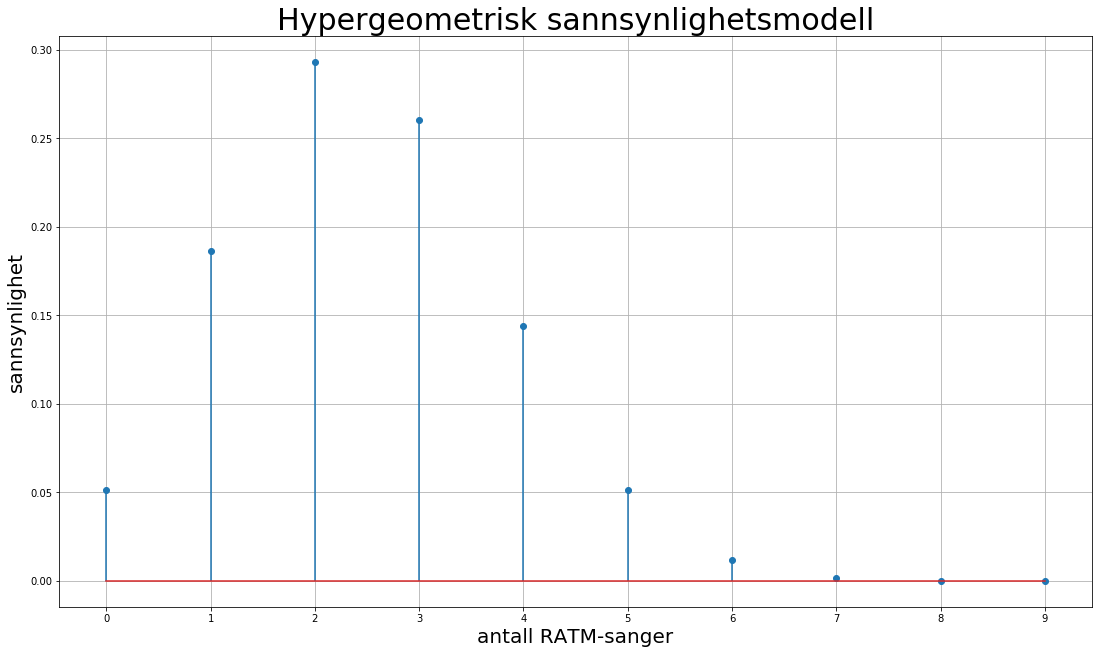

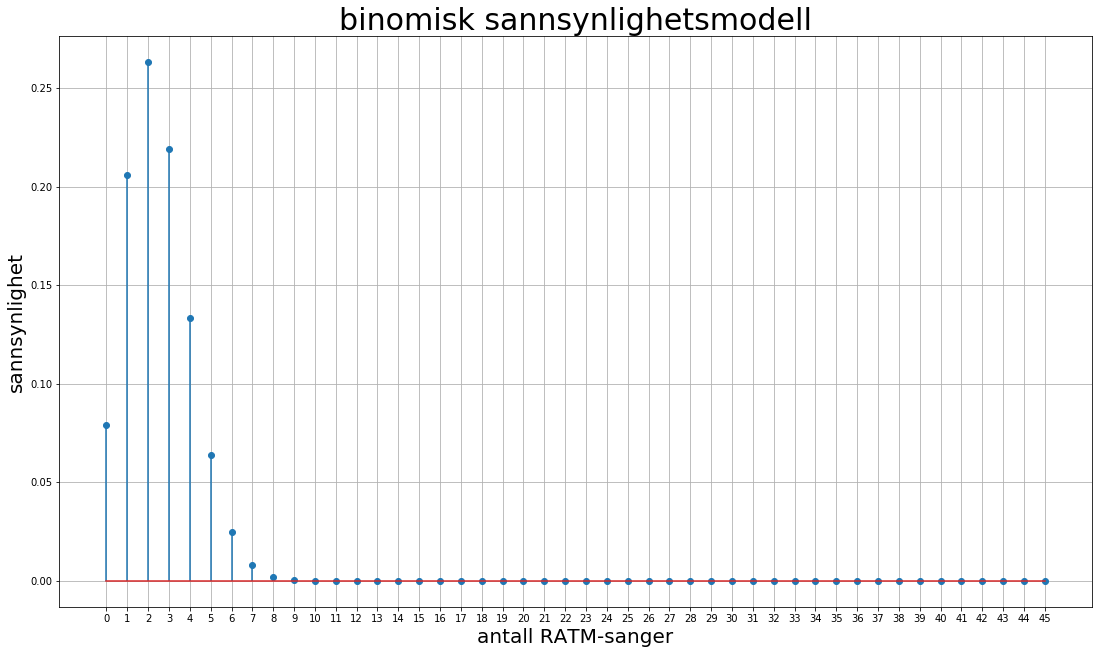

<Figure size 432x288 with 0 Axes>

In [127]:
import numpy as np
from matplotlib import pylab
import matplotlib

#from bokeh.io import output_notebook, show
#from bokeh.plotting import figure
#output_notebook()


# Beregn hypergeometrisk sannsynlighetsfordeling
# passende sannsynlighetsmodell ved trekk med tilbakelegging
def distH(a, b, n, r):
    nCr = naive_nCr
    nevner = nCr(n, r)
    y = np.zeros(a+1)
    
    for k, yk in enumerate(y):
        y[k] = nCr(a, k)*nCr(b, r - k)/nCr(n, r)
    return y
    



# Beregn og plot hypergeometrisk fordeling
y = distH(9, 155, 164, 45)    
#pylab.bar(x, y, width=-1, align='edge', color='#429bf5', edgecolor='black')
pylab.stem(y, use_line_collection=True)
#pylab.plot(x, y)
pylab.xlabel('antall RATM-sanger', fontsize="20")
pylab.ylabel('sannsynlighet', fontsize="20")
pylab.grid('True')
pylab.title('Hypergeometrisk sannsynlighetsmodell', fontsize="30")
pylab.xticks([x for x, y in enumerate(y)])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
pylab.figure()

# Beregn binomisk sannsynlighetsfordeling
# Passende sannsynlighetsmodell ved trekk uten tilbakelegging
def distB(a, b, n, r):
    """
    a = success
    b = failure
    n = total number of specimen
    r = total numer of trials
    """
    assert a == n - b
    

    
    y = np.zeros(r + 1)
    p = a/n
    
    for k, yk in enumerate(y):
        rCk = naive_nCr(r, k)
        
        y[k] = rCk*p**(k)*(1 - p)**(r - k)
    
    return y


yB = distB(9, 155, 164, 45)
#pylab.bar(x, y, width=-1, align='edge', color='#429bf5', edgecolor='black')
pylab.stem(yB, use_line_collection=True)
pylab.xlabel('antall RATM-sanger', fontsize="20")
pylab.ylabel('sannsynlighet', fontsize="20")
pylab.grid('True')
pylab.title('binomisk sannsynlighetsmodell', fontsize="30")
pylab.xticks([x for x, yi in enumerate(yB)])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
pylab.figure()


### Utvide modellen
Vi skal nå gjøre mer realistiske antakelser. Vi antar at hvis en sang er spilt, kan den ikke spilles de neste $Q$ sangene.
Dette er en blanding mellom binomisk og hypergeometrisk sannsynlighet. Vi har ikke en sannsynlighetsfordeling vi kan bestemme med en enkel formel, men vi kan tilnærme fordelingen ved å simulere situasjonen med programmering!

Som en test på at modellen er god, bør vi få tilnærmet den binomiske sannsynlighetsfordelingen når vi setter $Q=0$ og hypergeometrisk sannsynlighetsfordeling når vi setter $Q=45$.

Vi simulerer festen med en "top-out, random in" datastruktur. Du kan se hovedideen i skissen under

![](uml_playlist_pop_insert.jpg)

Vi implementerer en funksjon `simulate_one_party` som simulerer én fest, og gir ut resultatet av hvor mange sanger som ble spilt av vår artist på denne spesielle festen. Da kan vi enkelt simulere tusenvis av fester og sammenfatte resultatene.

Vi skriver også noen tester som sammenligner resultatene for `Q=0` med binomisk modell og `Q=r` med hypergeometrisk modell. Vi gjør først noen visuelle sammenlikninger før vi skriver mer spesifikke tester.

In [137]:
import random
from matplotlib import pyplot


def simulate_one_party(k, n, r, Q):
    """
    Simulate a party where a playlist contains k number of songs from a specific artist.
    The number of songs played during the party is r
    A song that has been played, must wait for Q songs before it can be played again
    
    n - total number of songs
    k - number of songs from specific artist
    r - number of songs played during party
    Q - que time measured in number of songs. Placed upon a song when played
    """
    
    c = n - k # complement
    
    artist_songs = [f'a {i}' for i in range(k)]
    nonartist_songs = [f'n {i}' for i in range(c)]
    
    playlist = artist_songs + nonartist_songs
    
    random.shuffle(playlist)
    

    
    # treat playlist as a top-out random in que
    # can not insert a song into the top Q songs due to que
    artist_songs_played = 0
    for i in range(r):
        currently_playing = playlist.pop()
        if 'a' in currently_playing.split(' '):
            artist_songs_played += 1
        
        
        if Q <= n:
            rand_index = random.randint(Q, n - 1)
            playlist.insert(-rand_index - 1, currently_playing)
        
    return artist_songs_played
    

def test_hypergeometric_similarity():
    # test similarity to hypergeometric distribution when Q>=r
    # (que time > number of songs played during party)

    k = 9
    n = 164
    r = 45
    Q = 45

    results = [0 for i in range(k + 1)]

    trials = 10000
    for i in range(trials):
        artist_played = simulate_one_party(k, n, r, Q)
        if artist_played > k:
            print(artist_played)
        else:
            results[artist_played] += 1

    results = [result/trials for result in results]

    pyplot.stem(results, use_line_collection=True)
    pyplot.title('plot to test similarity to hypergeometric distribution when Q>=r', fontsize='18')
    pyplot.xlabel('number of RATM songs played', fontsize='14')
    pyplot.ylabel('probability', fontsize='14')
    pyplot.grid('True')
    pyplot.xticks([i for i in range(k+1)])
    
    
    fig = pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    pyplot.figure()

def simulate_many_parties(Q=10, k=9, n=164, r=45, trials=10000):
    
    results = [0 for i in range(r + 1)]
    
    for i in range(trials):
        artist_played = simulate_one_party(k, n, r, Q)
        if artist_played > r:
            print(artist_played)
        else:
            results[artist_played] += 1

    results = [result/trials for result in results]

    pyplot.stem(results, use_line_collection=True)
    pyplot.title(f'plot distribution, Q={Q}', fontsize='18')
    pyplot.xlabel('number of RATM songs played', fontsize='14')
    pyplot.ylabel('probability', fontsize='14')
    pyplot.grid('True')
    pyplot.xticks([i for i in range(r+1)])
    
    fig = pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    pyplot.figure()

    
    
def test_binomial_similarity():
    
    simulate_many_parties(Q=0)






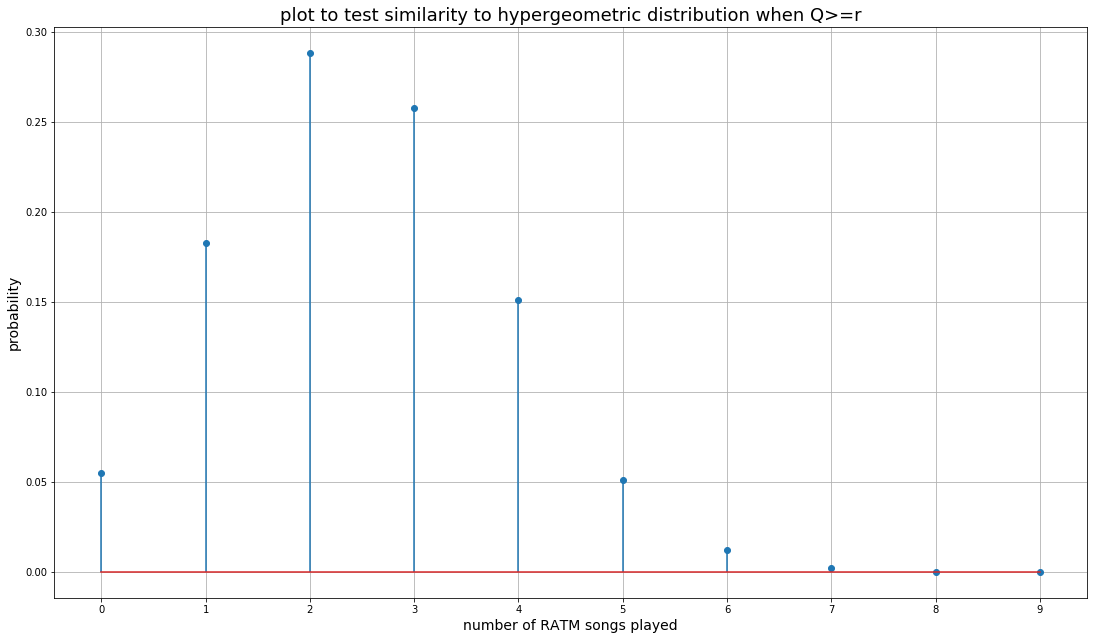

<Figure size 432x288 with 0 Axes>

In [129]:
test_hypergeometric_similarity()

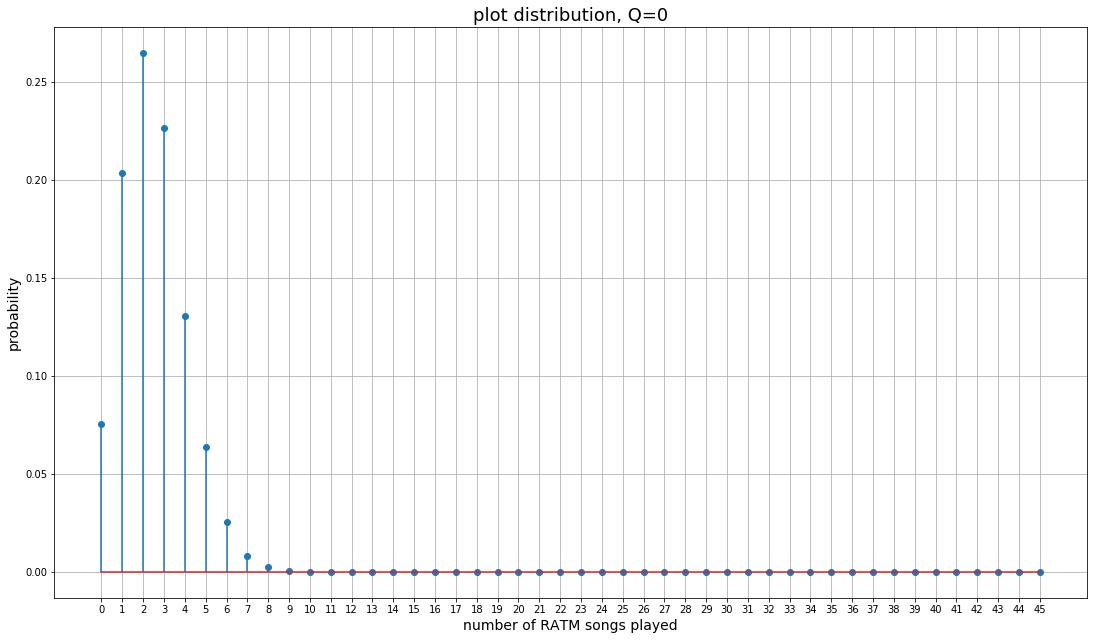

<Figure size 432x288 with 0 Axes>

In [138]:
test_binomial_similarity()

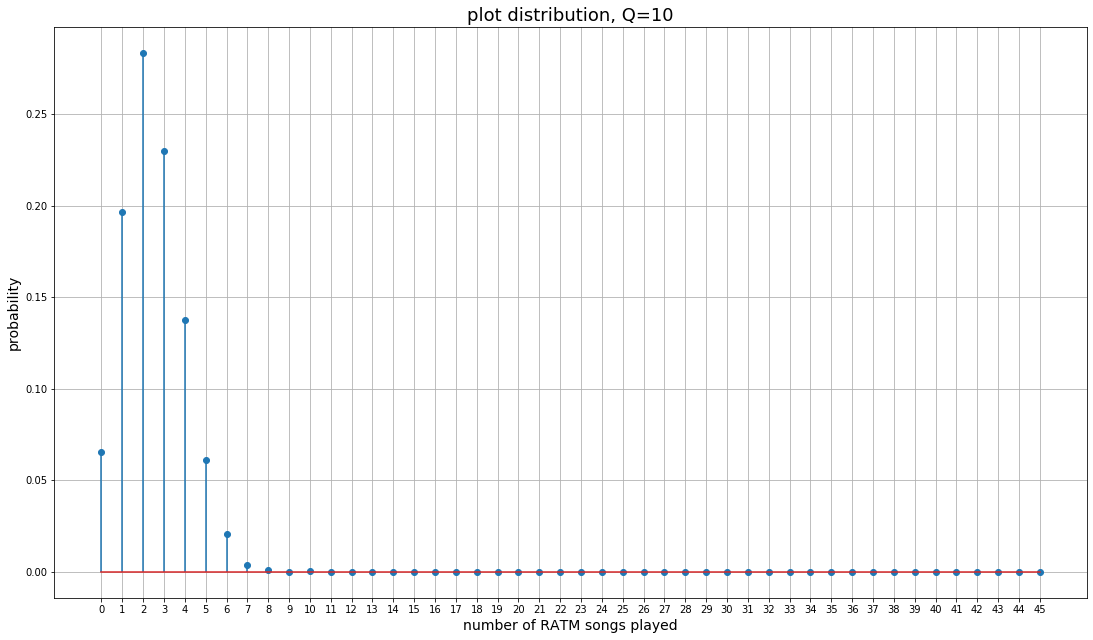

<Figure size 432x288 with 0 Axes>

In [139]:
simulate_many_parties(Q=10)

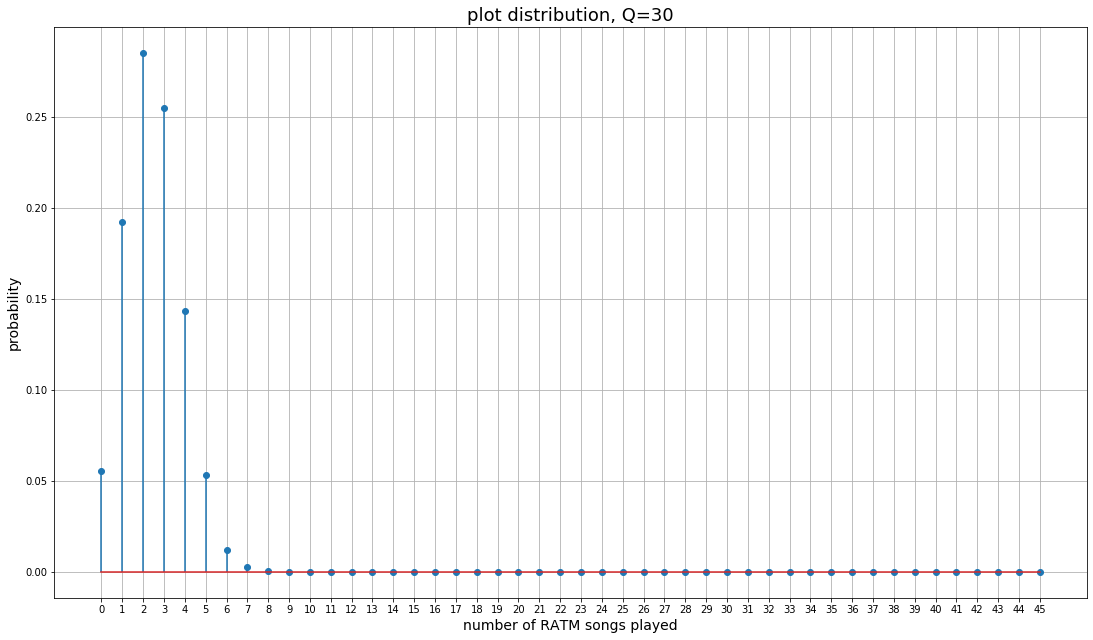

<Figure size 432x288 with 0 Axes>

In [141]:
simulate_many_parties(Q=30, trials=20000)

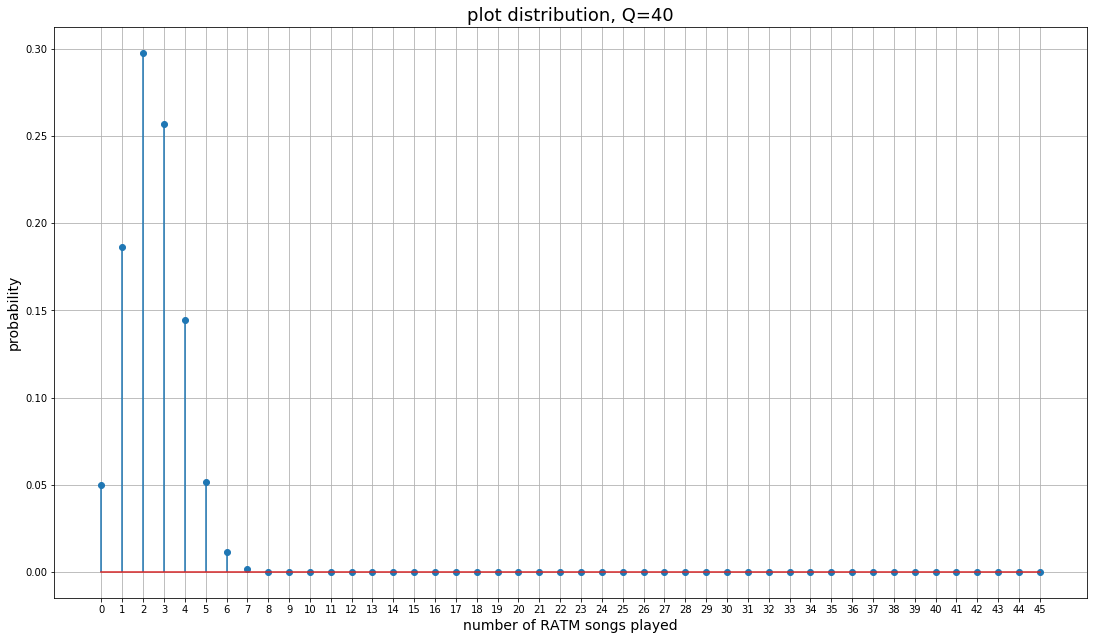

<Figure size 432x288 with 0 Axes>

In [142]:
simulate_many_parties(Q=40, trials=20000)

### Konvergenstester

Vi skal se på hvor stor typiske forkjeller er mellom fordelingene for ulike mengder forsøk (`trials`). I sted så vi på
dette visuelt, nå ønsker vi å kvantifisere forskjellen. Videre ønsker vi å se hvor raskt denne forskjellen typisk synker når vi øker antall forsøk.

En grei måte å måle "feilen" på er for eksempel summen av maksimalfeilen og gjennomsnittsfeilen.

La $X_e = (e)_{i=1}^N = (e_1, ..., e_N) $ være den eksakte fordelingen, og $X = (x)_{i=1}^N$ være den simulerte fordelingen.
Da er definerer vi et feilmål $\epsilon$ på følgende måte

\begin{align}
\epsilon = \text{max}|X_e - X| + \frac{1}{N}\sum_{i=1}^N|e_i - x_i| 
\end{align}